In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Consulta e Filtragem de Dados ##

**Carregar os dados**

In [3]:
df = pd.read_csv("dados_vendas.csv")
df.head()

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32


**Pergunta 1: Quantas linhas e colunas existem no DataFrame carregado?**

O DataFrame df possui 365 linhas e 5 colunas.

In [4]:
df.shape

(365, 5)

**Pergunta 2: Quais são os tipos de dados (dtypes) das colunas?**

O tipo de dados das colunas Data e Categoria é *object*.

O tipo da coluna Quantidade_Vendida é *int* (integer).

O tipo das colunas Preco_Unitario e Valor_Total é *float*. 

In [5]:
df.dtypes

Data                   object
Categoria              object
Quantidade_Vendida      int64
Preco_Unitario        float64
Valor_Total           float64
dtype: object

**Exibir as primeiras 5 linhas do DataFrame:**

In [6]:
df.head()

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32


**Pergunta 3: Quantas categorias únicas de produtos estão presentes no DataFrame?**

Há 5 categorias únicas de produtos no DataFrame.

In [7]:
categorias_unicas = len(df['Categoria'].unique())
categorias_unicas

5

**Filtrar os dados para mostrar apenas as vendas da categoria 'Eletrônicos':**

In [8]:
eletronicos = df[df['Categoria'] == 'Eletrônicos']
eletronicos.head()

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
5,2023-07-08,Eletrônicos,73,256.12,18696.76
6,2023-01-21,Eletrônicos,1,274.53,274.53
7,2023-04-13,Eletrônicos,51,248.32,12664.32
14,2023-06-01,Eletrônicos,34,303.52,10319.68
18,2023-09-15,Eletrônicos,39,121.40,4734.60


**Pergunta 4: Qual é a média do valor total das vendas na categoria 'Eletrônicos'?**

A média do valor total das vendas desta categoria é 12.291,26

In [9]:
round(eletronicos['Valor_Total'].mean(), 2)

np.float64(12291.26)

**Filtrar as vendas acima de R$ 1000:**

In [10]:
vendas_acima_1000 = df[df['Valor_Total'] > 1000]
vendas_acima_1000.head()

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32


**Pergunta 5: Quantas vendas acima de R$ 1000 ocorreram?**

Ocorreram 330 vendas acima de R$ 1000

In [11]:
vendas_acima_1000.shape

(330, 5)

## Agrupamento e Agregação ##

**Agrupar os dados por categoria e calcular o total de vendas por categoria:**

In [12]:
total_por_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()
total_por_categoria

,Categoria,Valor_Total
0,Alimentos,742457.74
1,Brinquedos,1187964.04
2,Eletrônicos,897261.71
3,Livros,963685.46
4,Roupas,991215.29


**Pergunta 6: Qual categoria teve o maior valor total de vendas?**

A categoria Brinquedos

**Calcular a quantidade média vendida por categoria:**

In [13]:
media_quantidade_categoria = df.groupby('Categoria')['Quantidade_Vendida'].mean().reset_index()
media_quantidade_categoria

,Categoria,Quantidade_Vendida
0,Alimentos,55.618182
1,Brinquedos,47.247191
2,Eletrônicos,46.780822
3,Livros,50.917808
4,Roupas,47.200000


**Pergunta 7: Qual categoria teve a maior quantidade média vendida?**

A categoria Alimentos

## Visualização de Dados ##

**Criar um gráfico de barras mostrando o total de vendas por categoria:**

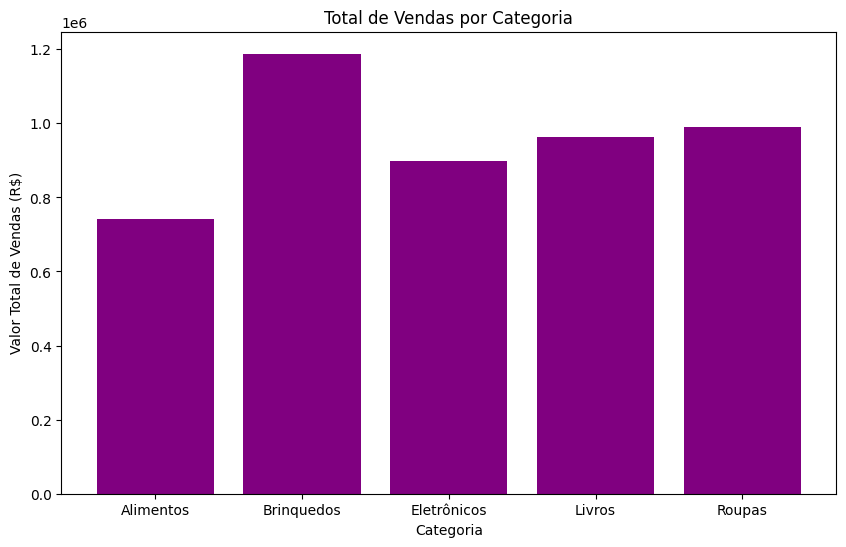

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(total_por_categoria['Categoria'], total_por_categoria['Valor_Total'], color='purple')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

**Pergunta 8: Com base no gráfico, qual categoria visualmente se destaca em termos de vendas totais?**

A categoria Brinquedos foi a que mais vendeu.

**Criar um gráfico de linha mostrando a variação diária das vendas de 'Eletrônicos':**

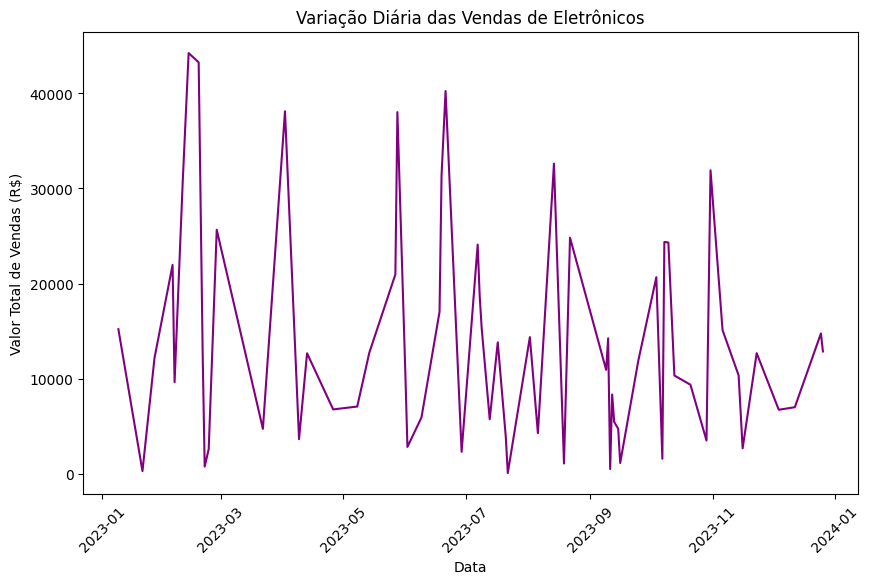

In [18]:
df['Data'] = pd.to_datetime(df['Data'])

vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='purple')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()

**Pergunta 9: Existe algum padrão ou tendência observável nas vendas diárias de eletrônicos?**

O que conseguimos observar a partir do gráfico é que há grande variação nas vendas diárias, tendo dias com alto volume de vendas seguidos de quedas substanciais e, isto ocorre ao longo de todo o período analisado. Podemos concluir, portanto, que não há um padrão ou tendência observável a partir destes dados.